In [ ]:
#importing pandas for data manipulation and analysis.
#it offers data structures and operations for manipulating numerical tables and time serie
import pandas as pd
import numpy as np
#Word Cloud is a data visualization technique used for representing text data in which the
!pip install wordcloud

In [ ]:
!pip install mlxtend
#Mlxtend is a Python library of useful tools for the day-to-day data science tasks

In [ ]:
##matplotlib.pyplot is a state-based interface to matplotlib which provides a MATLAB-like
#pyplot is mainly intended for interactive plots and simple cases of programmatic plot gen
import matplotlib.pyplot as plt


In [ ]:
#Seaborn is a plotting library that offers a simpler interface, sensible defaults for plot
import seaborn as sns
plt.style.use('fivethirtyeight')


In [ ]:
#Apriori is a algorithm for extracting frequent itemsets with applications in association
from mlxtend.frequent_patterns import apriori
#An association rule is an implication expression of the form X→Y, where X and Y are disjo
from mlxtend.frequent_patterns import association_rules


In [ ]:
#Reading a comma-separated values (csv) file into DataFrame
data = pd.read_csv('/content/Market_Basket_Optimisation.csv')

In [ ]:
#The function "shape" returns the shape of an array. The shape is a tuple of integers.
data.shape

(7500, 20)

In [ ]:
#head() Returns the first 5 rows of the dataframe.
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#The tail() function is used to get the last n rows from the object based on position
data.tail()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Pandas sample() is used to generate a sample random row or column from the function calle
data.sample(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
3695,ground beef,spaghetti,mineral water,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3516,shrimp,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4011,shrimp,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3534,tomatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3085,ground beef,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5506,ground beef,yams,cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6066,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,eggs,corn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5718,turkey,shrimp,pepper,spaghetti,cookies,pancakes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4289,grated cheese,pepper,pancakes,cake,french fries,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


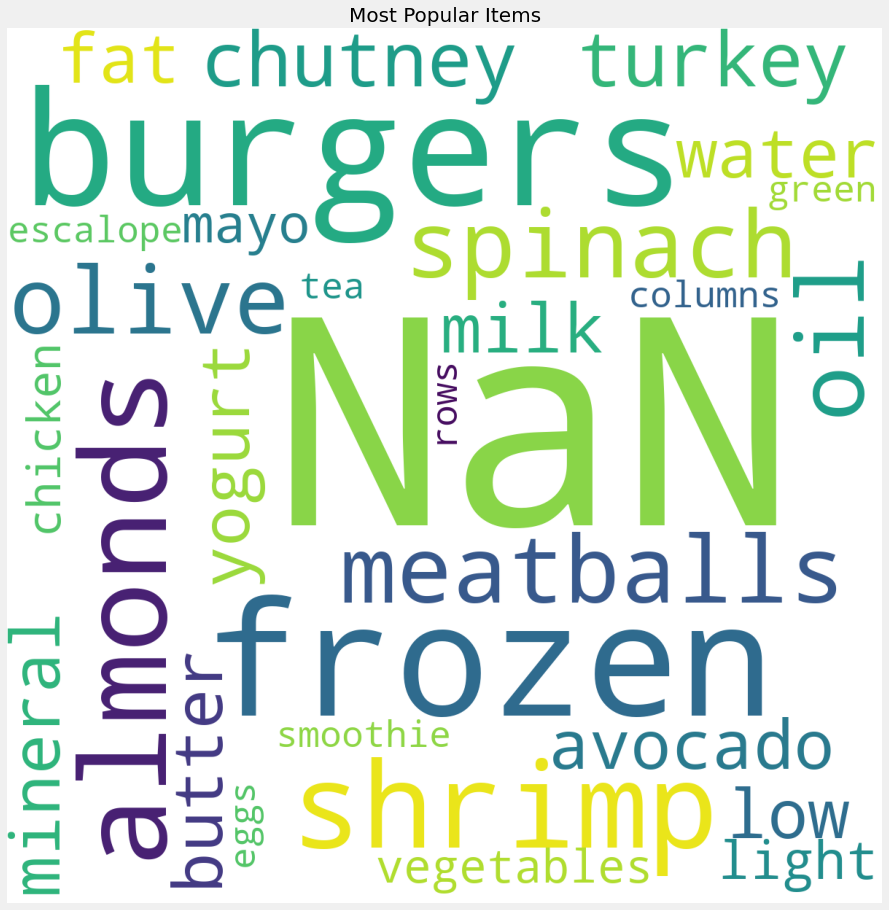

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#Word Cloud is a data visualization technique used for representing text data
plt.rcParams['figure.figsize'] = (15, 15)
#desc of attributes
wc = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data))
plt.imshow(wc)
plt.axis('off')
#plot the WordCloud image
plt.title('Most Popular Items',fontsize = 20)
plt.show()


In [ ]:
#Using and TransactionEncoder object, we can transform this dataset into an array format s
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7500):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])


In [ ]:
# conveting it into an numpy array
trans = np.array(trans)

In [ ]:
# checking the shape of the array
print(trans.shape)

(7500, 20)


In [ ]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)
 
data.shape

(7500, 121)

In [ ]:
#Warnings are provided to warn the developer of situations that aren't necessarily excepti
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# getting correlations for 121 items would be messy
# so let's reduce the items from 121 to 50
data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]
 
# checking the shape
data.shape


(7500, 40)

In [ ]:
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [ ]:
data.head()
#df. head() Returns the first 5 rows of the dataframe.

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,french fries,herb & pepper,ground beef,tomatoes,milk,escalope,fresh tuna,red wine,ham,cake,green tea,whole wheat pasta,pancakes,soup,muffins,energy bar,olive oil,champagne,avocado,pepper,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori
#Apriori is a algorithm for extracting frequent itemsets with applications in association
#let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.238267,(mineral water)
1,0.087200,(burgers)
2,0.062533,(turkey)
3,0.163867,(chocolate)
4,0.095333,(frozen vegetables)
...,...,...
206,0.010133,"(eggs, ground beef, mineral water)"
207,0.013067,"(milk, eggs, mineral water)"
208,0.011067,"(milk, ground beef, mineral water)"
209,0.010533,"(eggs, chocolate, spaghetti)"


In [ ]:
#output for extracting frequent itemsets
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238267,(mineral water),1
1,0.087200,(burgers),1
2,0.062533,(turkey),1
3,0.163867,(chocolate),1
4,0.095333,(frozen vegetables),1
5,0.174133,(spaghetti),1
6,0.071333,(shrimp),1
7,0.052400,(grated cheese),1
8,0.179733,(eggs),1
9,0.080400,(cookies),1


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
24,0.052667,"(mineral water, chocolate)",2
25,0.059733,"(spaghetti, mineral water)",2
26,0.050933,"(eggs, mineral water)",2


In [ ]:
# getting th item sets with length = 2 and support more han 10%
 
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
0,0.238267,(mineral water),1
1,0.087200,(burgers),1
2,0.062533,(turkey),1
3,0.163867,(chocolate),1
4,0.095333,(frozen vegetables),1
5,0.174133,(spaghetti),1
6,0.071333,(shrimp),1
7,0.052400,(grated cheese),1
8,0.179733,(eggs),1
9,0.080400,(cookies),1


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050933,"(eggs, mineral water)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238267,(mineral water),1


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'milk'} ]

,support,itemsets,length
13,0.1296,(milk),1


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.06,(chicken),1


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095333,(frozen vegetables),1
